# **Regression for Quantitative Finance: Part 1**

In [ ]:
# imports
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm # call <! pip install statsmodels>

## **Regression Introduction**

Chapter Content:
* What is Regression
* Ordinary Least Squares (OLS) estimation
* Simple Linear Regression  
* Multiple Linear Regression
* Regression in Matrix form
* OLS optimisation solution (general case)

### **What is Regression:**

Wikipedia's definition: "In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable ... and one or more independent variables..."

### **Why construct a regression model ?...**

1.   We may want to model the relationship between at least 2 or more variables (you can construct a regression using only one variable, this is called autoregression, and we will cover it in the future) to infer some causal relationship between the independent and dependant variable
2.   Interpolate, Forcast / Predict (Extrapolate) the relationship between variables

### **Regression Model Form**

Regression models purpose that $y$ (the dependant variable) is a function of the independent variables, $x$, and its effect on the dependant variables ($\beta$). Therefore, we have a model of form

$$
y_i = f(x_i, \beta) + \epsilon_i ; \quad \epsilon_i \sim N(\mu = 0, \sigma^2 = 1)
$$

This model is called the "Population Regression" and is often denoted as

### **Simple Linear Regression (SLR):**

In the SLR case The population model in the SLR case is 

$$
y_i = f(x_i, \beta) + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

The "population model is the regression model if we were to have all available data which is perfectly sampled with no inaccuracy (this is impossible). Ordinary Least Squares (OLS) is the estimation technique we use to solve the regression problem. OLS will provide us with an estimate of these "population parameters": $\hat{y}, \hat{f}(x, \beta)$. We can now define the fitted/estimated model. 

As a result of OLS we now have the following model

$$
\hat{y}_i = \hat{f}(x, \hat{\beta}) + e_i
$$

Where,
* True variables:
  * $x$ = Independent Variable (we think this variable "causes" variable $y$)
  * $y$ = This is the dependant variable (The variable we think is "caused" by $x$)
* Population / True Parameter
  * $\beta_0$ = The intercept term
  * $\beta_1$ = The slope term (this tell us the effect on $y$ for a unit increase in $x$)
* $e$ = Residual, this is the estimate of the non-observable error term 

### **Ordinary Least Squares (OLS) Estimation:**

OLS is a estimation technique for regression equations.

Particularly...

* OLS determines the best fitting straight line through a set of data points.
* OLS aims to minimize the sum of squared distances between the actual data points, $y_i$ and the estimated data points $\hat{y_i}$, often called the residuals, $e_i$.
* OLS estimates the unknown parameters $\beta_0$ and $\beta_1$ by using the observations in the sample, $y_i$ and $x_i$ for $i = 1,...,n$ (this is the index of the series, which must be of equal length for $y$ and $x$).

The intercept and slope estimates are obtained by solving the following minimisation problem (the OLS minimisation problem).

$$
\sum_{i=1}^n (e_i)^2 = \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 = \sum_{i=1}^n \left( y_i - f(x_i, \beta) \right)^2
$$

This is referred to as the objective or loss function, as stated prior by minimising this optimization problem we yield the OLS estimators of the slope ($\beta_1$) and intercept ($\beta_0$).

For the simple linear regression case (is uni-variate as it is a function of one variable $x$) the solution to the optimization problem will be

$$
\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x - \bar{x})^2} \\

\hat{\beta_0} = \hat{y} - \hat{\beta}_1 \hat{x}
$$

where,
* $\hat{x}$ = the sample mean estimator of $x$
* $\hat{y}$ = the sample mean estimator of $y$

To see how you can solve the OLS minimisation problem in the simple case see Appendix [2].

## **SLR Function**

In [ ]:
# let's create a simple linear regression using the OLS optimisation parameter solutions (these are the estimates)

class OLS:
  def __init__(self, IndependantVariable, DependantVariable, bias = True):
    self.RegressionType = "SLR"
    self.x = IndependantVariable.values
    self.y = DependantVariable.values
    self.bias = 1 if bias else 0

  def slr(self):

    # get means
    if len(self.x) == len(self.y):
        xbar = np.sum(self.x) / len(self.x)
        ybar = np.sum(self.y) / len(self.y)
    else:
      raise ValueError("Input lists must have the same length.")

    # parameter estimates
    n = [(i - xbar)*(j - ybar) for i, j in zip(self.x, self.y)] # zip combines elements with equal index frm the input iterable
    cov = np.sum(n) / len(self.x)
    d = [(k - xbar)**2 for k in self.x]
    var = np.sum(d) / len(self.y)
    b1hat = (1/var)*cov
    b0hat = ybar - b1hat*xbar
    x2 = np.linspace(self.x[0].min(), self.y[1].max(), 100)
    yhat = b0hat + b1hat*x2 + 0

    return b0hat, b1hat, x2, yhat


Implementing regression function on real stock data 

In [ ]:
# custom function to get returns for more than one stock
def returns(stocks: list, start_date , end_date):
  returns = []
  for i in range(len(stocks)): # note that indexing is exclusive, omiting the last index => (]
    stock = yf.download(stocks[i], start_date, end_date)
    stock = stock["Close"]
    returns.append(stock.pct_change().dropna())
  return returns

# call function
start_date, end_date = "2020-01-01", "2023-12-31"
tickers = ["ZM", "TSLA"]
returns_slr = returns(tickers, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Instentiate regression class and get parameters

In [ ]:
# lets estimate our regression
Regression = OLS(returns_slr[0], returns_slr[1])
beta0, beta1, x2, yhat = Regression.slr()
print("β0: %s, \nβ1: %s" %(beta0, beta1))

β0: 0.0027571752258973934, 
β1: 0.39226441004227336


Now that we have our regression parameter estimates we can plot our regression model.

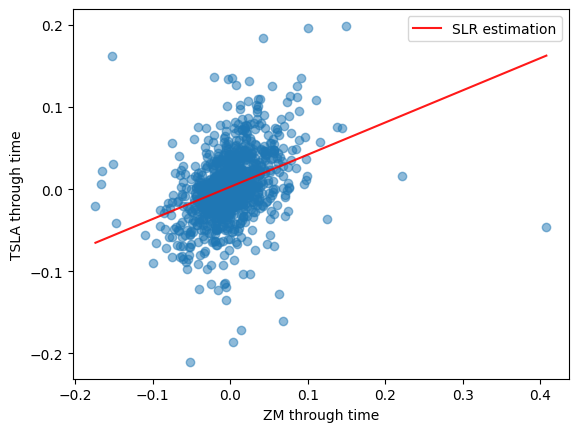

In [ ]:
plt.scatter(returns_slr[0], returns_slr[1], alpha = 0.5)
plt.plot(x2, yhat, label = "SLR estimation", alpha = 0.9, color = "red")
plt.xlabel(f"{tickers[0]} through time")
plt.ylabel(f"{tickers[1]} through time")
plt.title(f'Regression of {tickers[0]} vs {tickers[1]} Simple Market Returns')
plt.legend();

## **Multiple Linear Regression:**

We can extend the regression to include more independent variables, hence the name MLR. This may be useful as...

*   We want more accurate predictions. This can be achieved by including more than one independent variable affecting the dependent variable we are trying to model. Leaving out these key variables means that there are many confounding variables in our regression leading to bias estimates (the variation in y attributed to x is bias as x over / under estimates its true effect)

### **Multiple Linear Regression Model Example**

$$
y_i = \beta_0 + \beta_1 x_{i, 1} + \dots \beta_p x_{i, p} + \epsilon_i
$$

where:
* $i = 1,...,n$ (the index order)
* $p$ = The number of regressor terms (independent variables), this is equal to $k - 1$, were k is the number of coefficient terms.

We say the MLR model has $n$ independent variables and $p$ coefficients.


### **Regression Matrix Form**

Given n MLR models, instead of writing each model out n times we can summarise this list of models using matrix notation.

$$
\begin{bmatrix} Y_1 \\ \vdots \\ Y_n \end{bmatrix}_{n \times 1} = 
\begin{bmatrix} 
1 & X_{11} & \cdots & X_{1k} \\
1 & \vdots & \ddots & \vdots \\
1 & X_{n1} & \cdots & X_{nk} 
\end{bmatrix}_{n \times (k+1)} 
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_k \end{bmatrix}_{(k+1) \times 1} + 
\begin{bmatrix} \varepsilon_1 \\ \vdots \\ \varepsilon_n \end{bmatrix}_{n \times 1}
$$

Where,
*  $Y_{n \times 1}$ = dependant variable column vector
*  $X_{n \times K}$ = Independent variable matrix where $n>>k$, each row is an $iid$ observation of our $k$ dimensional feature vector and the entire row represents the $n$'th regressand value. Each column represents all $n$ $iid$ values of the $k$'th regressor.
*  $\beta_{n \times 1}$ = Parameter column vector
*  $\epsilon_{nx1}$ = Error (unobserved) column vector, assumed to equal 0.

This can be writen more simply like this...


$$
\boldsymbol{Y}_i = \boldsymbol{X}_{i, p} \cdot \boldsymbol{\beta} + \boldsymbol{\epsilon}_i \implies \boldsymbol{Y} = \boldsymbol{X} \cdot \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$


where,
* $\boldsymbol{Y} \in \mathbb{R}^{n}$ = dependant variable column vector
* $\boldsymbol{X} \in \mathbb{R}^{n \times p}$ = independent variable matrix (each column in this matrix represents the list of all independent variable values for one single independent variable, their are k independent variables in MLR models)
* $\boldsymbol{\beta} \in \mathbb{R}^{p}$ = coefficient column vector
* $\boldsymbol{\epsilon} \in \mathbb{R}^{p}$ = error column vector

### **OLS solution in the general case**

The least squares problem is defined as

$$
\min_{\boldsymbol{\beta}} || \boldsymbol{e} ||_2^{2} = \min_{\boldsymbol{\beta}} || \boldsymbol{Y} - \boldsymbol{\hat{Y}} ||_2^{2} 
$$

Where $|| f(\boldsymbol{X},\boldsymbol{\beta}) ||_2^2$ denotes the squared Eucildean norm of a vector 

Simpifying and Solving...

$$
\begin{align} \nonumber 
\frac{\partial}{\partial \boldsymbol{\beta}} \left[ ( \boldsymbol{Y} - \boldsymbol{X}\boldsymbol{\beta} )^\top (\boldsymbol{Y} - \boldsymbol{X}\boldsymbol{\beta}) \right]  
&= \frac{\partial}{\partial \boldsymbol{\beta}} \left[ \boldsymbol{Y}^\top \boldsymbol{Y} - \boldsymbol{Y}^\top \boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{\beta}^\top \boldsymbol{X}^\top \boldsymbol{Y} - \boldsymbol{\beta}^\top \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\beta} \right] \\ \nonumber
&= \frac{\partial}{\partial \boldsymbol{\beta}} \left[ \boldsymbol{Y}^\top \boldsymbol{Y} - 2\boldsymbol{Y}^\top \boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{\beta}^\top \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\beta} \right] \\ \nonumber
&= 2 \boldsymbol{Y}^\top \boldsymbol{X} - 2 \boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\beta} \\ \nonumber 
\boldsymbol{X}^\top \boldsymbol{X} \boldsymbol{\beta} &= \boldsymbol{Y}^\top \boldsymbol{X} \\  
\boldsymbol{\beta} &= \left( \boldsymbol{X}^\top \boldsymbol{X} \right)^{-1} \boldsymbol{Y}^\top \boldsymbol{X} 
\end{align}  
$$

Equation $1$ is the general solution to the OLS problem. We will now implement this formula numerically.

In [ ]:
# let's create a class that calculates the beta parameters of the regression (i.e. solves the OLS problem in the general case)

# for two variables
class LinearParamOLS:
  def __init__(self, x, y):
    self.RegressionType = "SLR"
    self.x = x.values
    self.y = y.values

  # The general solution to the least squares problem
  def ols(self):
    X = np.ones((2, len(self.x)))
    X[1:,] = self.x
    Xt = X.transpose()
    XXt = X @ Xt
    XXtinv = np.linalg.inv(XXt)
    XtY = X @ self.y
    param = XXtinv @ XtY
    b0, b1 = param[0], param[1]

    return b0, b1


call function

In [ ]:
# results will be equal
Regression = LinearParamOLS(returns_slr[0], returns_slr[1])
b0, b1 = Regression.ols()
print("β0: %s, \nβ1: %s" %(beta0, beta1))

β0: 0.0027571752258973934, 
β1: 0.39226441004227336


Note that the parameters values will be near identical when using other python packages

## **Regression using Python Modules**

Now that we know how regressions are calculated we can use the python packages, these packages will provide us with many extra statistics, packages also offer dynamic methods capable of constructing SLR's and MLR's in different forms (e.g. linear models, log-linear models, log-log models and many more)

### **Regression in Python using $\verb|statsmodels|$**

In [ ]:
X = returns_slr[0].values
Y = returns_slr[1].values
model = LinearRegression().fit(X.reshape(-1, 1), Y) # we transform X into a two-dimensional array (column vector)

# get intercept and slope
beta0 = model.intercept_
beta1 = model.coef_
print("β0: %s, \nβ1: %s" %(beta0, beta1))

β0: 0.002757175225897394, 
β1: [0.39226441]


### **Regression in Python using $\verb|scikit-learn|$ for more detailed results**

SLR example

In [ ]:
# X will now have a column of 1's, this is because this functions calculates the parameters using the regression in matrix form
X = sm.add_constant(X)

# creating model
model = sm.OLS(Y, X)
results = model.fit()

# get summary
print(results.summary())

# get some key statistics
print("R squared: ", results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           8.23e-32
Time:                        14:29:41   Log-Likelihood:                 1808.1
No. Observations:                1005   AIC:                            -3612.
Df Residuals:                    1003   BIC:                            -3602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.001      2.181      0.0

MLR Example:

In [ ]:
# lets construct a MLR model with two coefficients
tickers = ["ZM", "TSLA", "NVDA"]
returns_mlr = returns(tickers, start_date, end_date)

# our variables
X = list(zip(returns_mlr[1].values, returns_mlr[2].values))
Y = returns_mlr[0].values

# add constants
X = sm.add_constant(X)

# model
model = sm.OLS(Y, X)
res = model.fit()

# get summary
res = res.summary()
print(res)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.43e-43
Time:                        14:55:01   Log-Likelihood:                 1928.4
No. Observations:                1005   AIC:                            -3851.
Df Residuals:                    1002   BIC:                            -3836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.557      0.5

## Appendix

This notebook was made with help of the following sources *(in no particular order)*

[1] -  https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Linear_Regression/notebook.ipynb $\\$
[2] -  [Deriving the least squares estimators of the slope and intercept (simple linear regression)](https://www.youtube.com/watch?v=ewnc1cXJmGA&list=WL&index=2) $\\$
[3] - https://en.wikipedia.org/wiki/Linear_least_squares $\\$
[3] -  https://online.stat.psu.edu/stat462/node/132/
